In [138]:
import pandas as pd

df = pd.read_csv("data/preprocessed.csv")


In [139]:
df

,merged,category,category_id
0,a million american roll sleev omicron target c...,U.S. NEWS,0
1,american airlin flyer charg ban life punch fli...,U.S. NEWS,0
2,woman call cop black birdwatch lose lawsuit em...,U.S. NEWS,0
3,cleaner dead bell bathroom a day bodi found po...,U.S. NEWS,0
4,report get ador surpri boyfriend live to behin...,U.S. NEWS,0
...,...,...,...
129537,local mon give hand singl mother tricia ward o...,DIVORCE,37
129538,father challeng jail sentenc child support lan...,DIVORCE,37
129539,tip help dog deal divorc break hard famili pet...,DIVORCE,37
129540,find love advic divorc woman legal freedom com...,DIVORCE,37


In [140]:
df.dropna(inplace=True)



In [141]:
df

,merged,category,category_id
0,a million american roll sleev omicron target c...,U.S. NEWS,0
1,american airlin flyer charg ban life punch fli...,U.S. NEWS,0
2,woman call cop black birdwatch lose lawsuit em...,U.S. NEWS,0
3,cleaner dead bell bathroom a day bodi found po...,U.S. NEWS,0
4,report get ador surpri boyfriend live to behin...,U.S. NEWS,0
...,...,...,...
129537,local mon give hand singl mother tricia ward o...,DIVORCE,37
129538,father challeng jail sentenc child support lan...,DIVORCE,37
129539,tip help dog deal divorc break hard famili pet...,DIVORCE,37
129540,find love advic divorc woman legal freedom com...,DIVORCE,37


In [142]:
import matplotlib.pyplot as plt


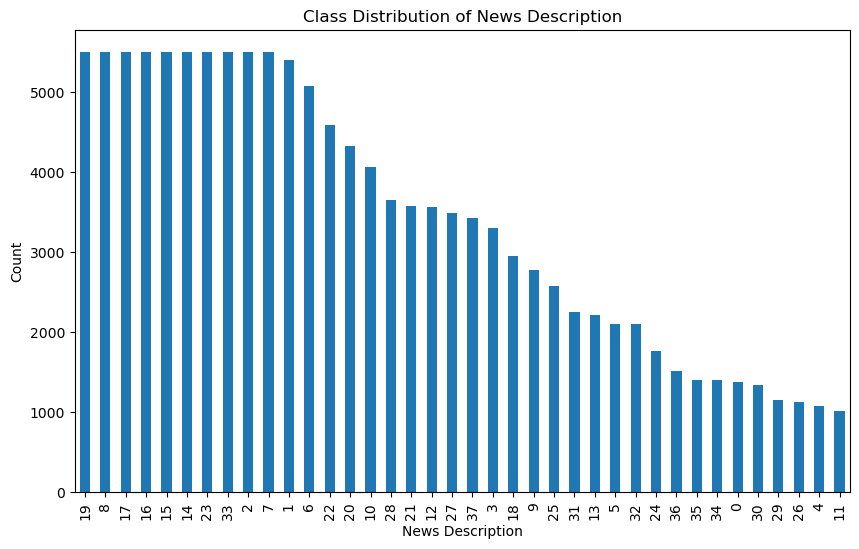

In [143]:
import matplotlib.pyplot as plt

# Calculate the class distribution
class_distribution = df['category_id'].value_counts()

# Plot the class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.xlabel('News Description')
plt.ylabel('Count')
plt.title('Class Distribution of News Description')
plt.show()


In [144]:
df['category'].value_counts()

category
QUEER VOICES      5500
POLITICS          5500
FOOD & DRINK      5500
STYLE & BEAUTY    5500
BUSINESS          5500
WELLNESS          5500
TRAVEL            5500
WORLDPOST         5500
PARENTING         5500
ENTERTAINMENT     5499
COMEDY            5398
SPORTS            5077
BLACK VOICES      4583
HOME & LIVING     4320
ENVIRONMENT       4066
WEDDINGS          3653
WOMEN             3572
CRIME             3562
IMPACT            3484
DIVORCE           3426
WORLD NEWS        3299
MEDIA             2944
WEIRD NEWS        2777
RELIGION          2577
STYLE             2254
SCIENCE           2206
TECH              2104
TASTE             2096
MONEY             1756
ARTS              1509
FIFTY             1400
GOOD NEWS         1398
U.S. NEWS         1377
ARTS & CULTURE    1339
COLLEGE           1144
LATINO VOICES     1130
CULTURE & ARTS    1074
EDUCATION         1014
Name: count, dtype: int64

In [153]:
# Calculate the class distribution
class_distribution = df['category'].value_counts()

# Filter out classes with less than 2500 examples
filtered_classes = class_distribution[class_distribution >= 5499].index

# Filter the dataframe based on the filtered classes
df_filtered = df[df['category'].isin(filtered_classes)]

# Print the filtered dataframe
print(df_filtered)


                                                   merged   category  \
6777    exerci pregnanc may boost babi brain power stu...  PARENTING   
6778    cost internet defam electron frontier evolv on...  PARENTING   
6779    scari mommi confess share secret stress le par...  PARENTING   
6780    technolog keep parent need get habit treat mes...  PARENTING   
6781    parent need talk kid same sex relationship chi...  PARENTING   
...                                                   ...        ...   
121803  region isi leader kill u drone strike pentagon...  WORLDPOST   
121804  amaz comput chip made live brain cell year ago...  WORLDPOST   
121805                isi relea a of captiv azid iraq nan  WORLDPOST   
121806  convict mexico miss of student case two year i...  WORLDPOST   
121807  turkish deputi prime minist tell woman laugh p...  WORLDPOST   

        category_id  
6777              2  
6778              2  
6779              2  
6780              2  
6781              2  
...

In [154]:
X = df_filtered['merged']
y = df_filtered['category']

In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.values)

In [156]:
import numpy as np

unique_values = np.unique(y)
print(unique_values)


[0 1 2 3 4 5 6 7 8 9]


In [157]:
X

6777      exerci pregnanc may boost babi brain power stu...
6778      cost internet defam electron frontier evolv on...
6779      scari mommi confess share secret stress le par...
6780      technolog keep parent need get habit treat mes...
6781      parent need talk kid same sex relationship chi...
                                ...                        
121803    region isi leader kill u drone strike pentagon...
121804    amaz comput chip made live brain cell year ago...
121805                  isi relea a of captiv azid iraq nan
121806    convict mexico miss of student case two year i...
121807    turkish deputi prime minist tell woman laugh p...
Name: merged, Length: 54999, dtype: object

In [158]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import torch

In [159]:
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
# device = torch.device("cpu")


There are 1 GPU(s) available.
Device name: NVIDIA GeForce RTX 4050 Laptop GPU


In [160]:
from nltk.tokenize import word_tokenize
from collections import defaultdict

def tokenize(texts):


    max_len = 0
    tokenized_texts = []
    word2idx = {}


    word2idx['<pad>'] = 0
    word2idx['<unk>'] = 1


    idx = 2
    for sent in texts:
        tokenized_sent = word_tokenize(sent)


        tokenized_texts.append(tokenized_sent)

        for token in tokenized_sent:
            if token not in word2idx:
                word2idx[token] = idx
                idx += 1

        # Update `max_len`
        max_len = max(max_len, len(tokenized_sent))

    return tokenized_texts, word2idx, max_len

def encode(tokenized_texts, word2idx, max_len):


    input_ids = []
    for tokenized_sent in tokenized_texts:
        # Pad sentences to max_len
        tokenized_sent += ['<pad>'] * (max_len - len(tokenized_sent))

        # Encode tokens to input_ids
        input_id = [word2idx.get(token) for token in tokenized_sent]
        input_ids.append(input_id)
    
    return np.array(input_ids)

In [161]:
from tqdm import tqdm_notebook

def load_pretrained_vectors(word2idx, fname):


    print("Loading pretrained vectors...")
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())

    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), d))
    embeddings[word2idx['<pad>']] = np.zeros((d,))


    count = 0
    for line in tqdm_notebook(fin):
        tokens = line.rstrip().split(' ')
        word = tokens[0]
        if word in word2idx:
            count += 1
            embeddings[word2idx[word]] = np.array(tokens[1:], dtype=np.float32)

    print(f"There are {count} / {len(word2idx)} pretrained vectors found.")

    return embeddings


In [162]:

print("Tokenizing...\n")
tokenized_texts, word2idx, max_len = tokenize(X)
input_ids = encode(tokenized_texts, word2idx, max_len)


embeddings = load_pretrained_vectors(word2idx, "fastText/crawl-300d-2M.vec")
embeddings = torch.tensor(embeddings)


Tokenizing...

Loading pretrained vectors...


/tmp/ipykernel_71296/1639468892.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(fin):


0it [00:00, ?it/s]

There are 17204 / 23287 pretrained vectors found.


In [163]:
input_ids.shape

(54999, 144)

In [164]:
y.shape

(54999,)

In [165]:
import numpy as np

num_unique_values = len(np.unique(y))
print(num_unique_values)

10


In [166]:
from torch.utils.data import (TensorDataset, DataLoader, RandomSampler,
                              SequentialSampler)

def data_loader(train_inputs, val_inputs, train_labels, val_labels,
                batch_size=50):
    """Convert train and validation sets to torch.Tensors and load them to
    DataLoader.
    """


    train_inputs, val_inputs, train_labels, val_labels =\
    tuple(torch.tensor(data) for data in
          [train_inputs, val_inputs, train_labels, val_labels])


    batch_size = 100


    train_data = TensorDataset(train_inputs, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

 
    val_data = TensorDataset(val_inputs, val_labels)
    val_sampler = SequentialSampler(val_data)
    val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

    return train_dataloader, val_dataloader


In [167]:
from sklearn.model_selection import train_test_split


train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    input_ids, y, test_size=0.2, random_state=42)

train_inputs, val_inputs, train_labels, val_labels = train_test_split(
    train_inputs, train_labels, test_size=0.1, random_state=42)


In [168]:
train_inputs.shape

(39599, 144)

In [169]:
val_inputs.shape

(4400, 144)

In [170]:
train_labels.shape

(39599,)

In [171]:
val_labels.shape

(4400,)

In [172]:
train_dataloader, val_dataloader = data_loader(train_inputs, val_inputs, train_labels, val_labels, batch_size=50)

In [173]:
filter_sizes = [2, 3, 4]
num_filters = [2, 2, 2]

In [174]:
train_inputs[24]

array([  276,   203,  1571,  3715, 11456,   234,   235,  1571,  1268,
         777,  1341,   506,   500, 17569,   206,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [194]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_NLP(nn.Module):
    """An 1D Convulational Neural Network for Sentence Classification."""
    def __init__(self,
                 pretrained_embedding=None,
                 freeze_embedding=False,
                 vocab_size=None,
                 embed_dim=300,
                 filter_sizes=[7, 7, 7],
                 num_filters=[50, 50, 50],
                 num_classes=10,
                 dropout=0.5):

        super(CNN_NLP, self).__init__()

        if pretrained_embedding is not None:
            self.vocab_size, self.embed_dim = pretrained_embedding.shape
            self.embedding = nn.Embedding.from_pretrained(pretrained_embedding,
                                                          freeze=freeze_embedding)
        else:
            self.embed_dim = embed_dim
            self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                          embedding_dim=self.embed_dim,
                                          padding_idx=0,
                                          max_norm=5.0)
    
        self.conv1d_list = nn.ModuleList([
            nn.Conv1d(in_channels=self.embed_dim,
                      out_channels=num_filters[i],
                      kernel_size=filter_sizes[i])
            for i in range(len(filter_sizes))
        ])

        self.fc = nn.Linear(np.sum(num_filters), num_classes)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, input_ids):
        """Perform a forward pass through the network.

        Args:
            input_ids (torch.Tensor): A tensor of token ids with shape
                (batch_size, max_sent_length)

        Returns:
            logits (torch.Tensor): Output logits with shape (batch_size,
                n_classes)
        """

        # Get embeddings from `input_ids`. Output shape: (b, max_len, embed_dim)
        x_embed = self.embedding(input_ids).float()

        # Permute `x_embed` to match input shape requirement of `nn.Conv1d`.
        # Output shape: (b, embed_dim, max_len)
        x_reshaped = x_embed.permute(0, 2, 1)

        # Apply CNN and ReLU. Output shape: (b, num_filters[i], L_out)
        x_conv_list = [F.relu(conv1d(x_reshaped)) for conv1d in self.conv1d_list]

        # Max pooling. Output shape: (b, num_filters[i], 1)
        x_pool_list = [F.max_pool1d(x_conv, kernel_size=x_conv.shape[2])
            for x_conv in x_conv_list]
        
        # Concatenate x_pool_list to feed the fully connected layer.
        # Output shape: (b, sum(num_filters))
        x_fc = torch.cat([x_pool.squeeze(dim=2) for x_pool in x_pool_list],
                         dim=1)
        
        # Compute logits. Output shape: (b, n_classes)
        logits = self.fc(self.dropout(x_fc))

        return logits


In [195]:
import torch.optim as optim

def initilize_model(pretrained_embedding=None,
                    freeze_embedding=False,
                    vocab_size=None,
                    embed_dim=300,
                    filter_sizes=[3, 3, 3],
                    num_filters=[100,100,100],
                    num_classes=10,
                    dropout=0.7,
                    learning_rate=0.01):
    """Instantiate a CNN model and an optimizer."""

    assert (len(filter_sizes) == len(num_filters)), "filter_sizes and \
    num_filters need to be of the same length."

    # Instantiate CNN model
    cnn_model = CNN_NLP(pretrained_embedding=pretrained_embedding,
                        freeze_embedding=freeze_embedding,
                        vocab_size=vocab_size,
                        embed_dim=embed_dim,
                        filter_sizes=filter_sizes,
                        num_filters=num_filters,
                        num_classes=24,
                        dropout=0.5)
    
    # Send model to `device` (GPU/CPU)
    cnn_model.to(device)

    # Instantiate Adadelta optimizer
    optimizer = optim.Adadelta(cnn_model.parameters(),
                               lr=learning_rate,
                               rho=0.95)

    return cnn_model, optimizer


In [196]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility."""

    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, optimizer, train_dataloader, val_dataloader=None, epochs=10):
    """Train the CNN model."""
    
    # Tracking best validation accuracy
    best_accuracy = 0

    # Start training loop
    print("Start training...\n")
    print(f"{'Epoch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
    print("-"*60)

    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================

        # Tracking time and loss
        t0_epoch = time.time()
        total_loss = 0

        # Put the model into the training mode
        model.train()

        for step, batch in enumerate(train_dataloader):
            # Load batch to GPU
            b_input_ids, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Update parameters
            optimizer.step()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        # =======================================
        #               Evaluation
        # =======================================
        if val_dataloader is not None:
            # After the completion of each training epoch, measure the model's
            # performance on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Track the best accuracy
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            
    print("\n")
    print(f"Training complete! Best accuracy: {best_accuracy:.2f}%.")

def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's
    performance on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled
    # during the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy


In [198]:
set_seed(42)
cnn_rand, optimizer = initilize_model(vocab_size=len(word2idx),
                                      freeze_embedding=True,
                                      learning_rate=0.25,
                                      dropout=0.7)
train(cnn_rand, optimizer, train_dataloader, val_dataloader, epochs=30)

Start training...

 Epoch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
------------------------------------------------------------
   1    |   1.775546   |  1.268372  |   63.14   |   7.44   
   2    |   1.214779   |  1.027089  |   68.68   |   7.45   
   3    |   0.996053   |  0.937412  |   71.09   |   7.49   
   4    |   0.859508   |  0.892378  |   72.82   |   7.39   
   5    |   0.748535   |  0.867996  |   73.25   |   7.47   
   6    |   0.660918   |  0.855778  |   73.77   |   7.45   
   7    |   0.583567   |  0.859428  |   73.59   |   7.43   
   8    |   0.516800   |  0.861790  |   74.30   |   7.40   
   9    |   0.468448   |  0.863249  |   74.61   |   7.41   
  10    |   0.411300   |  0.876316  |   74.93   |   7.32   
  11    |   0.367803   |  0.881561  |   75.14   |   7.35   
  12    |   0.336821   |  0.899154  |   74.59   |   7.37   
  13    |   0.301578   |  0.916450  |   74.61   |   7.39   
  14    |   0.269740   |  0.929150  |   74.89   |   7.41   
  15    |   0.247604

In [208]:
def predict(tokens, model=cnn_rand.to("cpu"), max_len=62):
    
    input_id = [word2idx.get(token, word2idx['<unk>']) for token in tokens]

    # Convert to PyTorch tensors
    input_id = torch.tensor(input_id).unsqueeze(dim=0)

    # Compute logits
    logits = model.forward(input_id)

    #  Compute probability
    probs = F.softmax(logits, dim=1).squeeze(dim=0)

    print(probs)


In [210]:
for input in test_inputs:
    predict(input)

tensor([0.0057, 0.6149, 0.0545, 0.0163, 0.0324, 0.0609, 0.0156, 0.0381, 0.0160,
        0.0196, 0.0093, 0.0084, 0.0092, 0.0101, 0.0085, 0.0090, 0.0084, 0.0089,
        0.0090, 0.0086, 0.0100, 0.0089, 0.0085, 0.0091],
       grad_fn=<SqueezeBackward1>)
tensor([0.0057, 0.6149, 0.0545, 0.0163, 0.0324, 0.0609, 0.0156, 0.0381, 0.0160,
        0.0196, 0.0093, 0.0084, 0.0092, 0.0101, 0.0085, 0.0090, 0.0084, 0.0089,
        0.0090, 0.0086, 0.0100, 0.0089, 0.0085, 0.0091],
       grad_fn=<SqueezeBackward1>)
tensor([0.0057, 0.6149, 0.0545, 0.0163, 0.0324, 0.0609, 0.0156, 0.0381, 0.0160,
        0.0196, 0.0093, 0.0084, 0.0092, 0.0101, 0.0085, 0.0090, 0.0084, 0.0089,
        0.0090, 0.0086, 0.0100, 0.0089, 0.0085, 0.0091],
       grad_fn=<SqueezeBackward1>)
tensor([0.0057, 0.6149, 0.0545, 0.0163, 0.0324, 0.0609, 0.0156, 0.0381, 0.0160,
        0.0196, 0.0093, 0.0084, 0.0092, 0.0101, 0.0085, 0.0090, 0.0084, 0.0089,
        0.0090, 0.0086, 0.0100, 0.0089, 0.0085, 0.0091],
       grad_fn=<SqueezeBack